In [1]:
import numpy as np

In [115]:
class support_vector_machine:
  def __init__(self,learning_rate,no_of_iterations,lambda_parameter):
    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations
    self.lambda_parameter = lambda_parameter

  def fit(self,x_train,y_train):
    self.m,self.n = x_train.shape
    self.w = np.zeros(self.n)
    self.b = 0
    self.x_train = x_train
    self.y_train = y_train

    for i in range(self.no_of_iterations):
      self.update_weights()

  def update_weights(self):
    self.y_label = np.where(self.y_train<=0,-1,1)
    for index,x_i in enumerate(self.x_train):
      condition = self.y_label[index]*(np.dot(self.w,x_i))
      if(condition==True):
        dw = 2*np.dot(self.lambda_parameter,self.w)
        db = 0
      else:
        dw = 2*np.dot(self.lambda_parameter,self.w) - np.dot(self.y_label[index],x_i)
        db = -self.y_label[index]

    self.w = self.w - self.learning_rate*dw
    self.b = self.w - self.learning_rate*db

  def predict(self,x_test):
    linear_output = np.dot(x_test, self.w) + self.b
    return np.where(linear_output >= 0, 1, 0)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,hinge_loss

In [3]:
wine = pd.read_csv(r"/content/winequality-red.csv")
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
wine.shape

(1599, 12)

In [5]:
wine.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [6]:
wine.describe(include='all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
wine.dtypes

,0
fixed acidity,float64
volatile acidity,float64
citric acid,float64
residual sugar,float64
chlorides,float64
free sulfur dioxide,float64
total sulfur dioxide,float64
density,float64
pH,float64
sulphates,float64


In [8]:
for i in wine.columns:
  print(i,":",wine[i].unique())
  print()

fixed acidity : [ 7.4  7.8 11.2  7.9  7.3  7.5  6.7  5.6  8.9  8.5  8.1  7.6  6.9  6.3
  7.1  8.3  5.2  5.7  8.8  6.8  4.6  7.7  8.7  6.4  6.6  8.6 10.2  7.
  7.2  9.3  8.   9.7  6.2  5.   4.7  8.4 10.1  9.4  9.   8.2  6.1  5.8
  9.2 11.5  5.4  9.6 12.8 11.  11.6 12.  15.  10.8 11.1 10.  12.5 11.8
 10.9 10.3 11.4  9.9 10.4 13.3 10.6  9.8 13.4 10.7 11.9 12.4 12.2 13.8
  9.1 13.5 10.5 12.6 14.  13.7  9.5 12.7 12.3 15.6  5.3 11.3 13.   6.5
 12.9 14.3 15.5 11.7 13.2 15.9 12.1  5.1  4.9  5.9  6.   5.5]

volatile acidity : [0.7   0.88  0.76  0.28  0.66  0.6   0.65  0.58  0.5   0.615 0.61  0.62
 0.56  0.59  0.32  0.22  0.39  0.43  0.49  0.4   0.41  0.71  0.645 0.675
 0.685 0.655 0.605 0.38  1.13  0.45  0.67  0.52  0.935 0.29  0.31  0.51
 0.42  0.63  0.69  0.735 0.725 0.705 0.785 0.75  0.625 0.3   0.55  1.02
 0.775 0.9   0.545 0.575 0.33  0.54  1.07  0.695 1.33  0.745 1.04  0.715
 0.415 0.34  0.68  0.95  0.53  0.64  0.885 0.805 0.73  0.37  0.835 1.09
 0.57  0.44  0.635 0.82  0.48  1.    0.21  

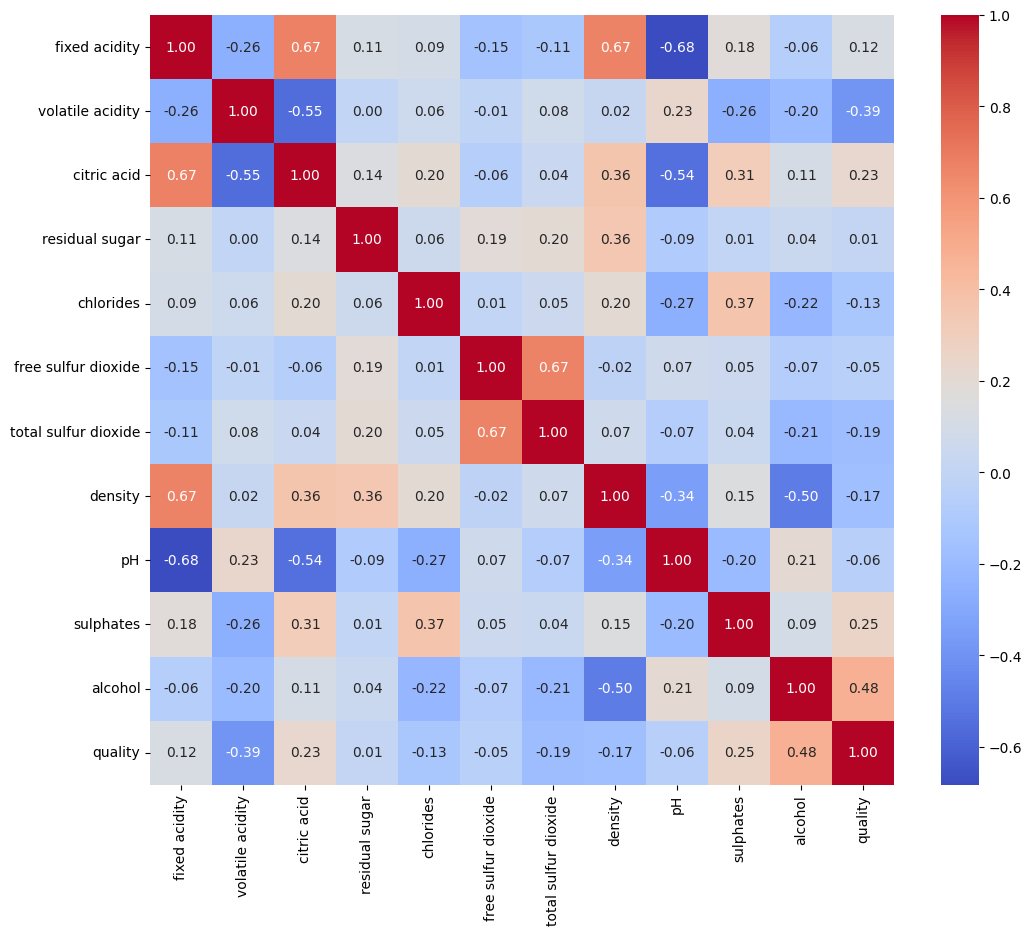

In [11]:
d= wine.corr()
plt.figure(figsize=(12,10))
sns.heatmap(d,annot=True,cmap='coolwarm',fmt='.2f')
plt.show()

In [12]:
ip = wine.drop('quality',axis=1)
op = wine['quality']

In [13]:
ip.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [14]:
op.head()

,quality
0,5
1,5
2,5
3,6
4,5


In [100]:
x_train,x_test,y_train,y_test = train_test_split(ip,op,test_size=0.2,random_state=20)

In [101]:
x_train.shape

(1279, 11)

In [102]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [103]:
x_test

array([[-0.74730611, -1.39885405,  1.58782567, ...,  0.43572792,
         0.33522946,  0.11608062],
       [-0.03016807,  0.20398156, -1.22159731, ..., -0.59329743,
        -1.30253277, -0.84128534],
       [ 0.13532533,  1.41992581,  1.13631126, ..., -2.00820729,
         2.96734731, -1.22423173],
       ...,
       [-0.74730611,  0.89485897,  0.33361898, ..., -0.20741292,
        -0.24968562, -1.03275854],
       [-0.19566146,  4.45978644, -1.42227038, ...,  1.46475328,
        -1.06856674,  0.40329041],
       [-0.80247058, -1.67520502,  0.08277764, ...,  1.91495187,
         0.92014454, -0.45833896]])

In [106]:
model = SVC(kernel = "rbf",random_state=20)

In [107]:
model.fit(x_train,y_train)

SVC(random_state=20)

In [108]:
pred = model.predict(x_test)

In [109]:
pred

array([6, 5, 5, 5, 6, 6, 6, 6, 5, 5, 6, 6, 5, 5, 6, 5, 6, 6, 6, 6, 5, 6,
       5, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 6, 5, 6, 5, 5, 6, 6, 5, 5, 7, 5,
       7, 5, 5, 6, 6, 6, 6, 5, 5, 6, 6, 6, 5, 6, 5, 5, 5, 5, 6, 5, 5, 5,
       6, 5, 6, 6, 5, 6, 6, 6, 5, 7, 5, 6, 6, 5, 5, 6, 5, 6, 5, 6, 6, 5,
       5, 5, 5, 6, 5, 5, 6, 6, 6, 5, 7, 6, 5, 5, 7, 5, 6, 6, 5, 5, 5, 6,
       5, 5, 5, 5, 5, 5, 6, 5, 5, 6, 6, 5, 5, 5, 5, 6, 5, 5, 6, 7, 6, 5,
       5, 5, 5, 6, 6, 6, 6, 6, 5, 6, 6, 5, 6, 7, 6, 5, 5, 6, 5, 5, 5, 6,
       6, 7, 5, 5, 5, 6, 6, 6, 6, 5, 6, 6, 5, 5, 5, 6, 7, 6, 5, 6, 6, 7,
       5, 6, 5, 5, 6, 7, 6, 6, 5, 5, 6, 6, 5, 5, 6, 5, 6, 6, 6, 7, 5, 6,
       6, 6, 7, 6, 6, 5, 6, 5, 5, 5, 5, 6, 6, 6, 5, 6, 7, 5, 5, 6, 6, 6,
       5, 5, 6, 6, 6, 6, 5, 6, 6, 6, 5, 6, 6, 7, 5, 5, 7, 6, 6, 5, 5, 6,
       6, 5, 6, 6, 5, 6, 5, 6, 5, 5, 6, 5, 5, 6, 6, 5, 5, 6, 6, 5, 5, 5,
       6, 5, 6, 6, 5, 5, 6, 6, 6, 6, 5, 7, 6, 6, 6, 5, 5, 6, 6, 5, 5, 5,
       5, 6, 5, 7, 5, 6, 5, 6, 6, 6, 6, 5, 6, 5, 5,

In [112]:
ac = accuracy_score(y_test,pred)
print("Accuracy:",ac)


Accuracy: 0.621875
